In [1]:
import numpy as np 
from emanu import util as UT
from emanu import obvs as Obvs

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
def readc3PCF(mneut, i, nzbin, i_dr=0, zspace=False, nside=20, nbin=20):
    ctpcf_i = Obvs.cthreePCF_halo(mneut, i, nzbin, zspace=zspace, i_dr=i_dr, nside=nside, nbin=nbin)
    for ell in range(11): 
        if ell == 0: 
            ctpcf_mat = np.zeros((11, ctpcf_i[0].shape[0]))
            ctpcf_mat[0] = ctpcf_i[0]
        else: 
            ctpcf_mat[ell] = ctpcf_i[ell]
    return ctpcf_mat


def mu_ctpcfs(mneut): 
    nzbin = 4
    zspace = False

    tpcfs = [] 
    for ireal in range(1,26): 
        tpcfs.append(readc3PCF(mneut, ireal, nzbin, zspace=zspace, nside=20, nbin=20))
    tpcfs = np.array(tpcfs)
    mu_tpcfs = np.average(tpcfs, axis=0)
    return mu_tpcfs

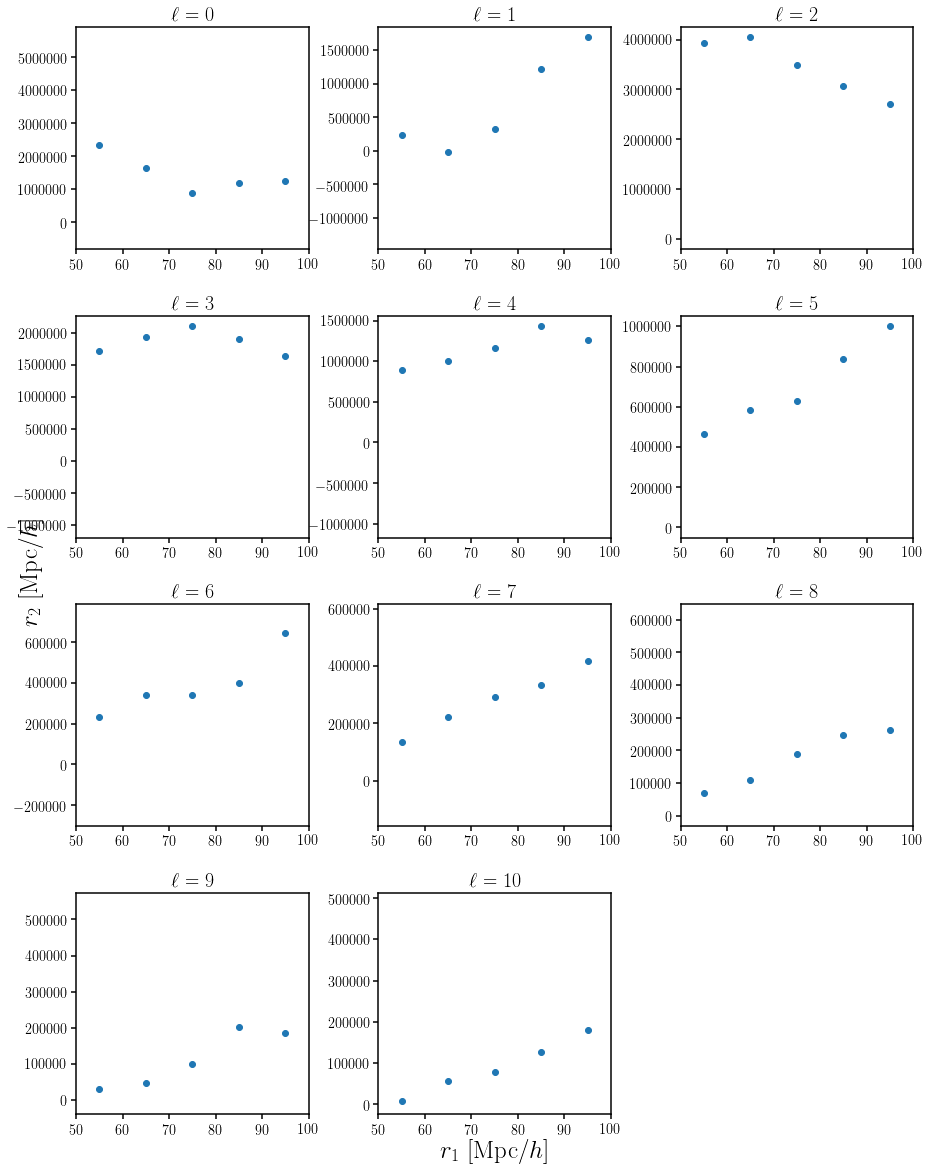

In [8]:
r1edge = np.linspace(0., 200., 21)
r1mid = 0.5 * (r1edge[1:] + r1edge[:-1])
fig = plt.figure(figsize=(15,20))
bkgd = fig.add_subplot(111, frameon=False)
for ell in range(11):
    sub = fig.add_subplot(4,3,ell+1)
    mu_ctpcf = mu_ctpcfs(0.0)
    sub.scatter(r1mid, mu_ctpcf[ell])
    sub.set_title("$\ell="+str(ell)+"$", fontsize=20)
    sub.set_xlim([50., 100])
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bkgd.set_xlabel(r'$r_1$ [Mpc/$h$]', fontsize=25)
bkgd.set_ylabel(r'$r_2$ [Mpc/$h$]', fontsize=25)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

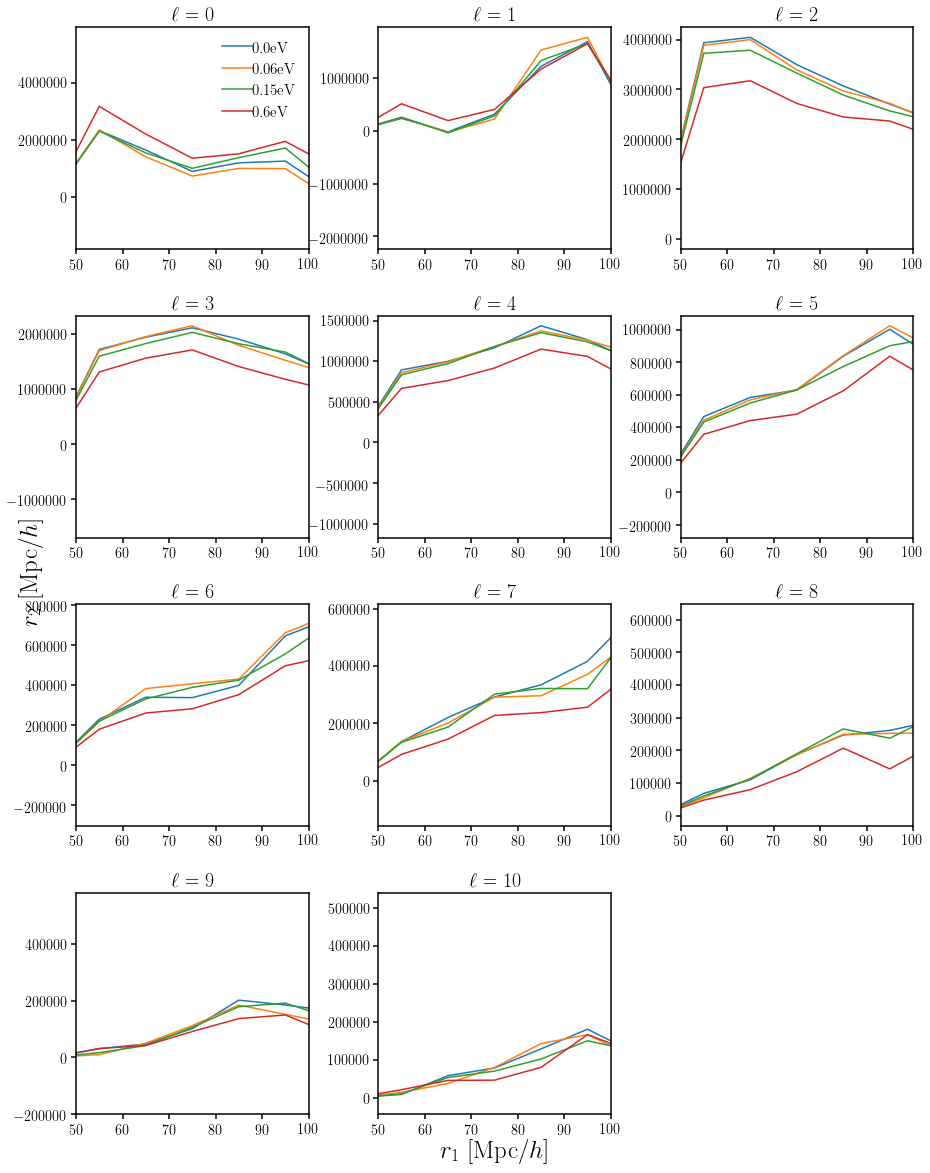

In [14]:
r1edge = np.linspace(0., 200., 21)
r1mid = 0.5 * (r1edge[1:] + r1edge[:-1])
fig = plt.figure(figsize=(15,20))
bkgd = fig.add_subplot(111, frameon=False)
for ell in range(11):
    sub = fig.add_subplot(4,3,ell+1)
    for mn in [0.0, 0.06, 0.15, 0.6]: 
        mu_ctpcf = mu_ctpcfs(mn)
        sub.plot(r1mid, mu_ctpcf[ell], label=str(mn)+'eV')
    sub.set_title("$\ell="+str(ell)+"$", fontsize=20)
    sub.set_xlim([50., 100])
    if ell == 0: sub.legend(loc='best', markerscale=2, handletextpad=0., fontsize=15)
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bkgd.set_xlabel(r'$r_1$ [Mpc/$h$]', fontsize=25)
bkgd.set_ylabel(r'$r_2$ [Mpc/$h$]', fontsize=25)
fig.subplots_adjust(hspace=0.3, wspace=0.3)